# **Compute Sentiment Using 4 SyuzhetR and 7 SentimentR Models**

* https://www.youtube.com/watch?v=U3ByGh8RmSc

* https://github.com/ttimbers/intro-to-reticulate

[Use R on Google Colab!](https://colab.research.google.com/notebook#create=true&language=r)

# **[STEP 1] Manual Configuration/Setup**



## (Popups) Connect Google gDrive

In [1]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive', force_remount=True)
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


## (3 Inputs) Define Directory Tree

In [2]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.

# #@markdown **Instructions**

# #@markdown Set Directory and Corpus names:
# #@markdown <li> Set <b>Path_to_SentimentArcs</b> to the project root in your **GDrive folder**
# #@markdown <li> Set <b>Corpus_Genre</b> = [novels, finance, social_media]
# #@markdown <li> <b>Corpus_Type</b> = [reference_corpus, new_corpus]
# #@markdown <li> <b>Corpus_Number</b> = [1-20] (id nunmber if a new_corpus)

#@markdown <hr>

# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/sentimentarcs_notebooks/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}


#@markdown Set this to the project root in your <b>GDrive folder</b>
#@markdown <br> (e.g. /<wbr><b>gdrive/MyDrive/research/sentiment_arcs/</b>)

#@markdown <hr>

#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "finance" #@param ["novels", "social_media", "finance"]

# Corpus_Type = "reference" #@param ["new", "reference"]
Corpus_Type = "reference" #@param ["new", "reference"]


Corpus_Number = 1 #@param {type:"slider", min:0, max:10, step:1}


#@markdown Put in the corresponding Subdirectory under **./text_raw**:
#@markdown <li> All Texts as clean <b>plaintext *.txt</b> files 
#@markdown <li> A <b>YAML Configuration File</b> describing each Texts

#@markdown Please verify the required textfiles and YAML file exist in the correct subdirectories before continuing.

print('Current Working Directory:')
%cd $Path_to_SentimentArcs

print('\n')

if Corpus_Type == 'reference':
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_reference'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_reference'
else:
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'

# PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_TEXT_RAW}'
# PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'
PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'

# TODO: Clean up
# SUBDIR_TEXT_CLEAN = PATH_TEXT_CLEAN

print(f'PATH_SENTIMENT_RAW:\n  [{PATH_SENTIMENT_RAW}]')
print(f'SUBDIR_SENTIMENT_RAW:\n  [{SUBDIR_SENTIMENT_RAW}]')

print('\n')

print(f'PATH_TEXT_CLEAN:\n  [{PATH_TEXT_CLEAN}]')
print(f'SUBDIR_TEXT_CLEAN:\n  [{SUBDIR_TEXT_CLEAN}]')

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW:
  [./sentiment_raw/sentiment_raw_finance_reference]
SUBDIR_SENTIMENT_RAW:
  [sentiment_raw_finance_reference]


PATH_TEXT_CLEAN:
  [./text_clean/text_clean_finance_reference]
SUBDIR_TEXT_CLEAN:
  [text_clean_finance_reference]


# **[STEP 2] Automatic Configuration/Setup**

In [3]:
# Add PATH for ./utils subdirectory

import sys
import os

!python --version

print('\n')

PATH_UTILS = f'{Path_to_SentimentArcs}utils'
PATH_UTILS

sys.path.append(PATH_UTILS)

print('Contents of Subdirectory [./sentiment_arcs/utils/]\n')
!ls $PATH_UTILS

# More Specific than PATH for searching libraries
# !echo $PYTHONPATH

Python 3.7.13


Contents of Subdirectory [./sentiment_arcs/utils/]

config_matplotlib.py   get_subdirs.py	    sentiment_analysis.py
config_seaborn.py      global_constants.py  sentiment_arcs_config.py
file_utils.py	       global_vars.py	    set_globals.py
get_fullpath.py        __init__.py	    subdir_constants.py
get_model_families.py  __pycache__	    test.py
get_sentimentr.R       read_yaml.py	    text_cleaners_new.py
get_sentiments.py      sa_config.py	    text_cleaners.py


In [6]:
# Review Global Variables and set the first few

import global_vars as global_vars

global_vars.SUBDIR_SENTIMENTARCS = Path_to_SentimentArcs
global_vars.Corpus_Genre = Corpus_Genre
global_vars.Corpus_Type = Corpus_Type
global_vars.Corpus_Number = Corpus_Number

global_vars.SUBDIR_SENTIMENT_RAW = SUBDIR_SENTIMENT_RAW
global_vars.PATH_SENTIMENT_RAW = PATH_SENTIMENT_RAW

global_vars.SUBDIR_TEXT_CLEAN = SUBDIR_TEXT_CLEAN
global_vars.PATH_TEXT_CLEAN = PATH_TEXT_CLEAN

dir(global_vars)

['Corpus_Genre',
 'Corpus_Number',
 'Corpus_Type',
 'FNAME_SENTIMENT_RAW',
 'MIN_PARAG_LEN',
 'MIN_SENT_LEN',
 'NotebookModels',
 'PATH_SENTIMENT_RAW',
 'PATH_TEXT_CLEAN',
 'PATH_TEXT_RAW_CORPUS',
 'SLANG_DT',
 'STOPWORDS_ADD_EN',
 'STOPWORDS_DEL_EN',
 'SUBDIR_CRUXES',
 'SUBDIR_DATA',
 'SUBDIR_GRAPHS',
 'SUBDIR_SENTIMENTARCS',
 'SUBDIR_SENTIMENT_CLEAN',
 'SUBDIR_SENTIMENT_RAW',
 'SUBDIR_TEXT_CLEAN',
 'SUBDIR_TEXT_RAW',
 'SUBDIR_TIMESERIES_CLEAN',
 'SUBDIR_TIMESERIES_RAW',
 'SUBDIR_UTILS',
 'TEST_SENTENCES_LS',
 'TEST_WORDS_LS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'corpus_texts_dt',
 'corpus_titles_dt',
 'corpus_titles_ls',
 'lexicons_dt',
 'model_titles_dt',
 'models_ensemble_dt']

## (each time) Custom Libraries & Define Globals

In [8]:
# Initialize and clean for each iteration of notebook

# dir(global_vars)

global_vars.corpus_texts_dt = {}
global_vars.corpus_titles_dt = {}

In [9]:
# Import SentimentArcs Utilities to define Directory Structure
#   based the Selected Corpus Genre, Type and Number

!pwd 
print('\n')

# from utils import sa_config # .sentiment_arcs_utils
from utils import sa_config

print('Objects in sa_config()')
print(dir(sa_config))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
sa_config.get_subdirs(Path_to_SentimentArcs, Corpus_Genre, Corpus_Type, Corpus_Number, 'none')


/gdrive/MyDrive/sentimentarcs_notebooks


Objects in sa_config()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'get_subdirs', 'global_vars', 'set_globals']


Verify the Directory Structure:

-------------------------------

           [Corpus Genre]: finance

            [Corpus Type]: reference


    [FNAME_SENTIMENT_RAW]: [NONE]




INPUTS:
-------------------------------

   [SUBDIR_SENTIMENTARCS]: /gdrive/MyDrive/sentimentarcs_notebooks/


STEP 1: Clean Text
--------------------

        [SUBDIR_TEXT_RAW]: ./text_raw/text_raw_finance_reference/

      [SUBDIR_TEXT_CLEAN]: ./text_clean/text_clean_finance_reference/


STEP 2: Get Sentiments
--------------------

   [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/sentiment_raw_finance_reference/

 [SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/sentiemnt_clean_finance_reference/


STEP 3: Smooth Time Series and Get Crux Points
--------------------

  [SUBDIR_TIMESERIES_RAW]: ./sentiment

In [10]:
# Call SentimentArcs Utility to define Global Variables

sa_config.set_globals()

# Verify sample global var set
print(f'MIN_PARAG_LEN: {global_vars.MIN_PARAG_LEN}')
print(f'STOPWORDS_ADD_EN: {global_vars.STOPWORDS_ADD_EN}')
print(f'TEST_WORDS_LS: {global_vars.TEST_WORDS_LS}')
print(f'SLANG_DT: {global_vars.SLANG_DT}')

MIN_PARAG_LEN: 10
STOPWORDS_ADD_EN: ['a', 'the', 'an']
TEST_WORDS_LS: ['Love', 'Hate', 'bizarre', 'strange', 'furious', 'elated', 'curious', 'beserk', 'gambaro']
SLANG_DT: {'$': ' dollar ', '€': ' euro ', '4ao': 'for adults only', 'a.m': 'before midday', 'a3': 'anytime anywhere anyplace', 'aamof': 'as a matter of fact', 'acct': 'account', 'adih': 'another day in hell', 'afaic': 'as far as i am concerned', 'afaict': 'as far as i can tell', 'afaik': 'as far as i know', 'afair': 'as far as i remember', 'afk': 'away from keyboard', 'app': 'application', 'approx': 'approximately', 'apps': 'applications', 'asap': 'as soon as possible', 'asl': 'age, sex, location', 'atk': 'at the keyboard', 'ave.': 'avenue', 'aymm': 'are you my mother', 'ayor': 'at your own risk', 'b&b': 'bed and breakfast', 'b+b': 'bed and breakfast', 'b.c': 'before christ', 'b2b': 'business to business', 'b2c': 'business to customer', 'b4': 'before', 'b4n': 'bye for now', 'b@u': 'back at you', 'bae': 'before anyone else', '

## Configure Jupyter Notebook

In [11]:
# Configure Jupyter

# To reload modules under development

# Option (a)
%load_ext autoreload
%autoreload 2
# Option (b)
# import importlib
# importlib.reload(functions.readfunctions)


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## (each time) Read YAML Configuration for Corpus and Models 

In [15]:
# from utils import sa_config # .sentiment_arcs_utils

import yaml

from utils import read_yaml

print('Objects in read_yaml()')
print(dir(read_yaml))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
read_yaml.read_corpus_yaml(Corpus_Genre, Corpus_Type, Corpus_Number)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = global_vars.models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = list(global_vars.corpus_titles_dt.keys())
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

global_vars.corpus_titles_dt

Objects in read_yaml()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'global_vars', 'read_corpus_yaml', 'yaml']


YAML Directory: text_raw/text_raw_finance_reference
YAML File: text_raw_finance_reference_info.yaml
SentimentArcs Model Ensemble ------------------------------

AutoGluon_Text
BERT_2IMDB
BERT_Dual_Coding
BERT_Multilingual
BERT_Yelp
CNN_DNN
Distilled_BERT
FLAML_AutoML
Fully_Connected_Network
HyperOpt_CNN_Flair_AutoML
LSTM_DNN
Logistic_Regression
Logistic_Regression_CV
Multilingual_CNN_Stanza_AutoML
Multinomial_Naive_Bayes
Pattern
Random_Forest
RoBERTa_Large_15DB
RoBERTa_XML_8Language
SentimentR_JockersRinker
SentimentR_Jockers
SentimentR_Bing
SentimentR_NRC
SentimentR_SentiWord
SentimentR_SenticNet
SentimentR_LMcD
SentimentR_SentimentR
PySentimentR_JockersRinker
PySentimentR_Huliu
PySentimentR_NRC
PySentimentR_SentiWord
PySentimentR_SenticNet
PySentimentR_LMcD
SyuzhetR_AFINN
SyuzhetR_Bing
SyuzhetR_NRC
SyuzhetR_Syuz

{'bogfederalreserve_speech_1997-2022': ['Federal Reserve Board of Governor Speeches (Jan 1997 - Feb 2022)',
  datetime.date(1997, 1, 8),
  datetime.date(2022, 2, 25)],
 'eucentralbank_speeches_1998-2022': ['European Central Bank Speeches (Jul 1998 - Mar 2022)',
  datetime.date(1998, 7, 17),
  datetime.date(2022, 3, 1)]}

## Install Libraries: R

In [16]:
# !pip install rpy2

In [17]:
# !pip install -U rpy2

In [18]:
# Load Jupyter rpy2 Extension  
#   enables the %%R magic commands

%load_ext rpy2.ipython

# %reload_ext rpy2.ipython

2022-04-06 12:58:13,899 : INFO : NumExpr defaulting to 2 threads.


In [19]:
%%time 
%%capture 
%%R

# Install Syuzhet.R, Sentiment.R and Utility Libraries

# NOTE: 1m12s 
#       1m05s

#       1m13s 00:47 @20220406Wed Novels Corpus1 2 Novels

install.packages(c('syuzhet', 'sentimentr', 'tidyverse', 'lexicon'))

library(syuzhet)
library(sentimentr)
library(tidyverse)
library(lexicon)

2022-04-06 12:58:14,294 : WARNING : R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

2022-04-06 12:58:15,529 : WARNING : R[write to console]: also installing the dependencies ‘slam’, ‘english’, ‘mgsub’, ‘qdapRegex’, ‘textshape’, ‘NLP’, ‘zoo’, ‘dtt’, ‘textclean’


2022-04-06 12:58:15,535 : WARNING : R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/slam_0.1-50.tar.gz'

2022-04-06 12:58:15,675 : WARNING : R[write to console]: Content type 'application/x-gzip'
2022-04-06 12:58:15,678 : WARNING : R[write to console]:  length 53641 bytes (52 KB)

2022-04-06 12:58:15,683 : WARNING : R[write to console]: =
2022-04-06 12:58:15,685 : WARNING : R[write to console]: =
2022-04-06 12:58:15,687 : WARNING : R[write to console]: =
2022-04-06 12:58:15,689 : WARNING : R[write to console]: =
2022-04-06 12:58:15,690 : WARNING : R[write to console]: =
2022-04-06 12:58:15,692 : WARNING : R[write to console]: =
2022-04-06 12:58:15,69

CPU times: user 4.96 s, sys: 455 ms, total: 5.42 s
Wall time: 1min 18s


In [20]:
# Load Python libraries to exchange data with R Program Space and read R Datafiles

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [21]:
%%R

# Verify R in Kernel Version
# R.version.string

# Verfiy R Kernel Environment
# Sys.getenv

# Verify R Kernel Session Info
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] lexicon_1.2.1    forcats_0.5.1    stringr_1.4.0    dplyr_1.0.8     
 [5] purrr_0.3.4      readr_2.1.2      tidyr_1.2.0      tibble_3.1.6    
 [9] ggplot2_3.3.5    tidyverse_1.3.1  sentimentr_2.9.0 syuzhet_1.0.6   

loaded via a namespace (and not atta

## Install Libraries: Python

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from glob import glob
import copy
import json # Installed above in YAML Configuration Section

## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [27]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------')
print('\n  (Uncomment to view)')
# plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')




 New figure size:  (20, 10)
Matplotlib Configuration ------------------------------

  (Uncomment to view)

  Edit ./utils/config_matplotlib.py to change


In [ ]:
"""
from cycler import cycler

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']   
linestyles = ['-', '--', ':', '-.','-', '--', ':', '-.','-', '--']

cycle = plt.cycler("color", colors) + plt.cycler("linestyle", linestyles)

# View previous matplotlib configuration
print('\n Old Matplotlib Configurtion Settings:\n')
# plt.rc.show
print('\n\n')

# Update and view new matplotlib configuration
print('\n New Matplotlib Configurtion Settings:\n')
myparams = {'axes.prop_cycle': cycle}
plt.rcParams.update(myparams)

plt.rcParams["axes.titlesize"] = 16
plt.rcParams['figure.figsize'] = 20,10
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 12

# Set matplotlib plot figure.figsize

new_plt_size = plt.rcParams["figure.figsize"]=(20,10)

print(" New figure size: ",new_plt_size)
""";

## Setup Seaborn Style

In [28]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')

"""
# Seaborn: Set Context
# sns.set_context("notebook")

# Seaborn: Set Theme (Scale of Font)
sns.set_theme('paper')  # paper, notebook, talk, poster

# Seaborn: Set Style
# sns.set_style('ticks') # darkgrid, whitegrid, dark, white, and ticks
plt.style.use('seaborn-whitegrid')

# sns.set_palette('tab10')
# sns.color_palette()

# sns.set_palette('tab10')
# sns.color_palette()
""";




Seaborn Configuration ------------------------------



In [25]:
"""
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')
# View previous seaborn configuration
print('\n Old Seaborn Configurtion Settings:\n')
sns.axes_style()
print('\n\n')

# Update and View new seaborn configuration
print('\n New Seaborn Configurtion Settings:\n')
# sns.set_style('white')
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('tab10')

# Change defaults
# sns.set(style='white', context='talk', palette='tab10')
""";


 Old Seaborn Configurtion Settings:



{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}





 New Seaborn Configurtion Settings:



## Python Utility Functions

### (each time) Generate Convenient Data Lists

In [30]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
global_vars.corpus_titles_dt
print('\n')

corpus_texts_ls = list(global_vars.corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(global_vars.corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


Dictionary: corpus_titles_dt


{'bogfederalreserve_speech_1997-2022': ['Federal Reserve Board of Governor Speeches (Jan 1997 - Feb 2022)',
  datetime.date(1997, 1, 8),
  datetime.date(2022, 2, 25)],
 'eucentralbank_speeches_1998-2022': ['European Central Bank Speeches (Jul 1998 - Mar 2022)',
  datetime.date(1998, 7, 17),
  datetime.date(2022, 3, 1)]}




Corpus Texts:
  bogfederalreserve_speech_1997-2022
  eucentralbank_speeches_1998-2022



Natural Corpus Titles:
  Federal Reserve Board of Governor Speeches (Jan 1997 - Feb 2022)
  European Central Bank Speeches (Jul 1998 - Mar 2022)


In [31]:
# Get Model Families of Ensemble

from utils.get_model_families import get_ensemble_model_famalies

global_vars.models_ensemble_dt = get_ensemble_model_famalies(global_vars.models_titles_dt)

print('\nTest: Lexicon Family of Models:')
global_vars.models_ensemble_dt['lexicon']


There are 12 Lexicon Models
  Lexicon Model #0: sentimentr_sentimentr
  Lexicon Model #1: pysentimentr_jockersrinker
  Lexicon Model #2: pysentimentr_huliu
  Lexicon Model #3: pysentimentr_nrc
  Lexicon Model #4: pysentimentr_sentiword
  Lexicon Model #5: pysentimentr_senticnet
  Lexicon Model #6: pysentimentr_lmcd
  Lexicon Model #7: syuzhetr_afinn
  Lexicon Model #8: syuzhetr_bing
  Lexicon Model #9: syuzhetr_nrc
  Lexicon Model #10: syuzhetr_syuzhetr
  Lexicon Model #11: afinn

There are 9 Heuristic Models
  Heuristic Model #0: pattern
  Heuristic Model #1: sentimentr_jockersrinker
  Heuristic Model #2: sentimentr_jockers
  Heuristic Model #3: sentimentr_bing
  Heuristic Model #4: sentimentr_nrc
  Heuristic Model #5: sentimentr_sentiword
  Heuristic Model #6: sentimentr_senticnet
  Heuristic Model #7: sentimentr_lmcd
  Heuristic Model #8: vader

There are 8 Traditional ML Models
  Traditional ML Model #0: autogluon
  Traditional ML Model #1: flaml
  Traditional ML Model #2: logreg


['sentimentr_sentimentr',
 'pysentimentr_jockersrinker',
 'pysentimentr_huliu',
 'pysentimentr_nrc',
 'pysentimentr_sentiword',
 'pysentimentr_senticnet',
 'pysentimentr_lmcd',
 'syuzhetr_afinn',
 'syuzhetr_bing',
 'syuzhetr_nrc',
 'syuzhetr_syuzhetr',
 'afinn']

### File Functions

In [29]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/file_utils.py'
# from utils.file_utils import *

# %run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read all Preprocessed Novels**

In [35]:
!ls {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

bogfederalreserve_speech_1997-2022.csv	test.txt
eucentralbank_speeches_1998-2022.csv


In [36]:
# Verify cwd and subdir of Cleaned Corpus Texts

print('Current Working Directory:')
!pwd

print(f'\nSubdir with all Cleaned Texts of Corpus:\n  {SUBDIR_TEXT_CLEAN}')

print(f'\n\nFilenames of Cleaned Texts:\n')
!ls -1 {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks

Subdir with all Cleaned Texts of Corpus:
  text_clean_finance_reference


Filenames of Cleaned Texts:

bogfederalreserve_speech_1997-2022.csv
eucentralbank_speeches_1998-2022.csv
test.txt


In [49]:
# Create a List (preprocessed_ls) of all preprocessed text files

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

try:
    preprocessed_ls = glob(f'{PATH_TEXT_CLEAN}/*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
except IndexError:
    raise RuntimeError('No csv file found')

print('\n'.join(preprocessed_ls))
print('\n')
print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')

bogfederalreserve_speech_1997-2022
eucentralbank_speeches_1998-2022


Found 2 Preprocessed files in text_clean_finance_reference


In [51]:
# Read all preprocessed text files into master DataFrame (corpus_dt)

corpus_texts_dt = {}

for i,atext in enumerate(preprocessed_ls):
  print(f'Processing #{i}: {atext}...')
  afile_fullpath = f'{PATH_TEXT_CLEAN}/{atext}.csv'
  print(f'               {afile_fullpath}')
  atext_df = pd.read_csv(afile_fullpath, index_col=[0])
  corpus_texts_dt[atext] = atext_df

Processing #0: bogfederalreserve_speech_1997-2022...
               ./text_clean/text_clean_finance_reference/bogfederalreserve_speech_1997-2022.csv
Processing #1: eucentralbank_speeches_1998-2022...
               ./text_clean/text_clean_finance_reference/eucentralbank_speeches_1998-2022.csv


In [52]:
# Verify the Text read into master Dictionary of DataFrames

corpus_texts_dt.keys()
print('\n')
print(f'There were {len(corpus_texts_dt)} preprocessed Text read into the Dict corpus_texts_dt')

dict_keys(['bogfederalreserve_speech_1997-2022', 'eucentralbank_speeches_1998-2022'])



There were 2 preprocessed novels read into the Dict corpus_texts_dt


In [53]:
# Check if there are any Null strings in the text_clean columns

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  print(f'\nNovel #{i}: {atext}')
  nan_ct = corpus_texts_dt[atext].text_clean.isna().sum()
  if nan_ct > 0:
    print(f'      {nan_ct} Null strings in the text_clean column')


Novel #0: bogfederalreserve_speech_1997-2022
      2576 Null strings in the text_clean column

Novel #1: eucentralbank_speeches_1998-2022
      4058 Null strings in the text_clean column


In [54]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, atext in enumerate(list(corpus_texts_dt.keys())):
  # print(f'Novel #{i}: {atext}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  corpus_texts_dt[atext][corpus_texts_dt[atext].text_clean.isna()] = 'empty_string'

In [55]:
# Verify DataFrame of first Text in Corpus Dictionary

corpus_texts_dt[next(iter(corpus_texts_dt))].head()

,text_raw,text_clean,text_cleaner
0,Mr. Meyer examines the role for structural mac...,mr meyer examine the role for structural macro...,examine the role for structural macroeconomic ...
1,The Role for Structural Macroeconomic Models I...,the role for structural macroeconomic model i ...,the role for structural macroeconomic model i ...
2,My journey began at MIT as a research assistan...,my journey begin at mit a a research assistant...,my journey begin at a a research assistant to ...
3,I bring to this panel a perspective shaped by ...,i bring to this panel a perspective shape by b...,i bring to this panel a perspective shape by b...
4,I will focus my presentation on the role of st...,i will focus my presentation on the role of st...,i will focus my presentation on the role of st...


# **[STEP 4] Get Sentiments with SyuzhetR (4 Models)**

## Compute New SyuzhetR Values

In [56]:
# Verify text_clean of sample text

corpus_texts_dt[next(iter(corpus_texts_dt))]['text_clean'].to_list()[:10]

['mr meyer examine the role for structural macroeconomic model in the monetary policy process remark by mr laurence h meyer a member of the board of governor of the us federal reserve system at the aea panel on monetary and fiscal policy hold in new orleans on',
 'the role for structural macroeconomic model i be in the middle of my 3 interest and active encounter with the development and or use of macroeconometric model for forecast and policy analysis',
 'my journey begin at mit a a research assistant to professor franco modigiliani and albert ando during the period of development of the mps model continue at laurence h meyer associate with the development of the washington university macro model under the direction of my partner joel prakken and the use of that model for both forecast and policy analysis and now have take me to the board of governor where macro model have long play a important role in forecast and policy analysis and the mps model have recently be replace by the frb 

In [57]:
%%time

# Compute Sentiments from all 4 Syuzhet Models applied to all 32 Novels (4 x 32 = 128 runs)

# NOTE:  9m45s 23:30 on 20220114 Colab Pro (33 Novels)
#       28:32s 21:06 on 20220226 Colab Pro (33 Novels)
#        3m20s 19:11 on 20220217 Colab Pro (2 Novels)
#        3m05s 19:17 on 20220217 Colab Pro (2 Novels)

#        2m21s 00:57 @20220406Wed Colab Pro (2 Novels)

#        1h29m 09:24 @20220406Wed Colab Pro (2 Financial Ref: Speeches FedGov & EU CenBank)

# base = importr('base')
syuzhet = importr('syuzhet')

# corpus_syuzhetr_dt = {}

# base.rank(0, na_last = True)
texts_titles_ls = list(corpus_texts_dt.keys())
texts_titles_ls.sort()
for i, anovel in enumerate(texts_titles_ls):
  print(f'Processing Novel #{i}: {anovel}...')
  corpus_texts_dt[anovel]['syuzhetr_syuzhet'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='syuzhet')
  corpus_texts_dt[anovel]['syuzhetr_bing'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='bing')
  corpus_texts_dt[anovel]['syuzhetr_afinn'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='afinn')
  corpus_texts_dt[anovel]['syuzhetr_nrc'] = syuzhet.get_sentiment(corpus_texts_dt[anovel]['text_clean'].to_list(), method='nrc')

Processing Novel #0: bogfederalreserve_speech_1997-2022...
Processing Novel #1: eucentralbank_speeches_1998-2022...
CPU times: user 1h 29min 11s, sys: 32 s, total: 1h 29min 43s
Wall time: 1h 29min 49s


In [60]:
%whos list

Variable           Type    Data/Info
------------------------------------
colors             list    n=10
corpus_texts_ls    list    n=2
corpus_titles_ls   list    n=2
linestyles         list    n=10
preprocessed_ls    list    n=2
texts_titles_ls    list    n=2


In [62]:
texts_titles_ls

['bogfederalreserve_speech_1997-2022', 'eucentralbank_speeches_1998-2022']

In [63]:
corpus_texts_dt[texts_titles_ls[0]].head()

,text_raw,text_clean,text_cleaner,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc
0,Mr. Meyer examines the role for structural mac...,mr meyer examine the role for structural macro...,examine the role for structural macroeconomic ...,2.00,0,0,3.0
1,The Role for Structural Macroeconomic Models I...,the role for structural macroeconomic model i ...,the role for structural macroeconomic model i ...,0.90,0,2,2.0
2,My journey began at MIT as a research assistan...,my journey begin at mit a a research assistant...,my journey begin at a a research assistant to ...,3.75,1,2,8.0
3,I bring to this panel a perspective shaped by ...,i bring to this panel a perspective shape by b...,i bring to this panel a perspective shape by b...,0.80,0,1,1.0
4,I will focus my presentation on the role of st...,i will focus my presentation on the role of st...,i will focus my presentation on the role of st...,4.35,1,3,8.0


In [64]:
# Verify First Text in Corpus has New SyuzhetR Columns with Plausible Values

# corpus_texts_dt[next(iter(corpus_texts_dt))].head()

corpus_texts_dt[texts_titles_ls[0]].head()
corpus_texts_dt[texts_titles_ls[0]].info()

corpus_texts_dt[texts_titles_ls[1]].head()
corpus_texts_dt[texts_titles_ls[1]].info()

,text_raw,text_clean,text_cleaner,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc
0,Mr. Meyer examines the role for structural mac...,mr meyer examine the role for structural macro...,examine the role for structural macroeconomic ...,2.00,0,0,3.0
1,The Role for Structural Macroeconomic Models I...,the role for structural macroeconomic model i ...,the role for structural macroeconomic model i ...,0.90,0,2,2.0
2,My journey began at MIT as a research assistan...,my journey begin at mit a a research assistant...,my journey begin at a a research assistant to ...,3.75,1,2,8.0
3,I bring to this panel a perspective shaped by ...,i bring to this panel a perspective shape by b...,i bring to this panel a perspective shape by b...,0.80,0,1,1.0
4,I will focus my presentation on the role of st...,i will focus my presentation on the role of st...,i will focus my presentation on the role of st...,4.35,1,3,8.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219966 entries, 0 to 219965
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   text_raw          219966 non-null  object 
 1   text_clean        219966 non-null  object 
 2   text_cleaner      219048 non-null  object 
 3   syuzhetr_syuzhet  219966 non-null  float64
 4   syuzhetr_bing     219966 non-null  int64  
 5   syuzhetr_afinn    219966 non-null  int64  
 6   syuzhetr_nrc      219966 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.4+ MB


,text_raw,text_clean,text_cleaner,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc
0,Mr. Duisenberg reports on the outcome of the s...,mr duisenberg report on the outcome of the 2 m...,duisenberg report on the outcome of the meet o...,0.55,0,0,5.0
1,The Governing Council first assessed current e...,the govern council ﻿1 assess current economic ...,the govern council assess current economic dev...,0.55,0,0,2.0
2,The general picture is one of continued econom...,the general picture be one of continue economi...,the general picture be one of continue economi...,0.35,0,0,1.0
3,Several forecasts made during spring 1998 have...,several forecast make during spring have even ...,several forecast make during spring have even ...,-0.35,0,0,0.0
4,"As far as price developments are concerned, in...",a far a price development be concern inflation...,a far a price development be concern inflation...,-0.70,-1,2,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 298570 entries, 0 to 298569
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   text_raw          298570 non-null  object 
 1   text_clean        298570 non-null  object 
 2   text_cleaner      297704 non-null  object 
 3   syuzhetr_syuzhet  298570 non-null  float64
 4   syuzhetr_bing     298570 non-null  int64  
 5   syuzhetr_afinn    298570 non-null  int64  
 6   syuzhetr_nrc      298570 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 18.2+ MB


## Checkpoint: Save SyuzhetR Values

In [65]:
%whos str

Variable                Type    Data/Info
-----------------------------------------
Corpus_Genre            str     finance
Corpus_Type             str     reference
PATH_SENTIMENT_RAW      str     ./sentiment_raw/sentiment_raw_finance_reference
PATH_TEXT_CLEAN         str     ./text_clean/text_clean_finance_reference
PATH_UTILS              str     /gdrive/MyDrive/sentimentarcs_notebooks/utils
Path_to_SentimentArcs   str     /gdrive/MyDrive/sentimentarcs_notebooks/
SUBDIR_SENTIMENT_RAW    str     sentiment_raw_finance_reference
SUBDIR_TEXT_CLEAN       str     text_clean_finance_reference
afile_fullpath          str     ./text_clean/text_clean_f<...>nk_speeches_1998-2022.csv
akey                    str     European Central Bank Spe<...>hes (Jul 1998 - Mar 2022)
anovel                  str     eucentralbank_speeches_1998-2022
atext                   str     eucentralbank_speeches_1998-2022


In [66]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'PATH_SENTIMENT_RAW: {PATH_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

!ls $PATH_SENTIMENT_RAW

/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW: ./sentiment_raw/sentiment_raw_finance_reference


Existing Sentiment Datafiles in Destination Subdir:

test.txt


In [67]:

%whos str

Variable                Type    Data/Info
-----------------------------------------
Corpus_Genre            str     finance
Corpus_Type             str     reference
PATH_SENTIMENT_RAW      str     ./sentiment_raw/sentiment_raw_finance_reference
PATH_TEXT_CLEAN         str     ./text_clean/text_clean_finance_reference
PATH_UTILS              str     /gdrive/MyDrive/sentimentarcs_notebooks/utils
Path_to_SentimentArcs   str     /gdrive/MyDrive/sentimentarcs_notebooks/
SUBDIR_SENTIMENT_RAW    str     sentiment_raw_finance_reference
SUBDIR_TEXT_CLEAN       str     text_clean_finance_reference
afile_fullpath          str     ./text_clean/text_clean_f<...>nk_speeches_1998-2022.csv
akey                    str     European Central Bank Spe<...>hes (Jul 1998 - Mar 2022)
anovel                  str     eucentralbank_speeches_1998-2022
atext                   str     eucentralbank_speeches_1998-2022


In [68]:
# Verify Saving Corpus

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Text_Type: finance
     Corpus_Type: reference

These Text Titles:



dict_keys(['bogfederalreserve_speech_1997-2022', 'eucentralbank_speeches_1998-2022'])

In [71]:
PATH_SENTIMENT_RAW

'./sentiment_raw/sentiment_raw_finance_reference'

In [72]:
!pwd

/gdrive/MyDrive/sentimentarcs_notebooks


In [77]:
# Save sentiment values to subdir_sentiments

save_filename = f'all_{Corpus_Genre}_{Corpus_Type}_4syuzhetr.json'

write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')

Saving file to: ./sentiment_raw/sentiment_raw_finance_reference/all_finance_reference_4syuzhetr.json


In [79]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 322598
-rw------- 1 root root         0 Apr  4 16:49 test.txt
-rw------- 1 root root 330339852 Apr  6 14:59 all_finance_reference_4syuzhetr.json


In [75]:
corpus_texts_dt[corpus_texts_ls[0]].head()

,text_raw,text_clean,text_cleaner,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc
0,Mr. Meyer examines the role for structural mac...,mr meyer examine the role for structural macro...,examine the role for structural macroeconomic ...,2.00,0,0,3.0
1,The Role for Structural Macroeconomic Models I...,the role for structural macroeconomic model i ...,the role for structural macroeconomic model i ...,0.90,0,2,2.0
2,My journey began at MIT as a research assistan...,my journey begin at mit a a research assistant...,my journey begin at a a research assistant to ...,3.75,1,2,8.0
3,I bring to this panel a perspective shaped by ...,i bring to this panel a perspective shape by b...,i bring to this panel a perspective shape by b...,0.80,0,1,1.0
4,I will focus my presentation on the role of st...,i will focus my presentation on the role of st...,i will focus my presentation on the role of st...,4.35,1,3,8.0


In [70]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=PATH_SENTIMENT_RAW)
test_dt.keys()

dict_keys(['bogfederalreserve_speech_1997-2022', 'eucentralbank_speeches_1998-2022'])

## Plot SyuzhetR 4 Models

In [128]:
#@markdown Select option to save plots:
Save_Raw_Plots = True #@param {type:"boolean"}

Save_Smooth_Plots = True #@param {type:"boolean"}
Resolution = "300" #@param ["100", "300"]



In [129]:
# Get Col Names for all 4 SyuzhetR Models

cols_all_ls = corpus_texts_dt[next(iter(corpus_texts_dt))].columns

cols_syuzhetr_ls = [x for x in cols_all_ls if 'syuzhetr_' in x]
cols_syuzhetr_ls

['syuzhetr_syuzhet', 'syuzhetr_bing', 'syuzhetr_afinn', 'syuzhetr_nrc']

In [130]:
corpus_texts_dt[next(iter(corpus_texts_dt))].iloc[0]

text_raw            "THE TRIBUTES"
text_clean             the tribute
syuzhetr_syuzhet               0.6
syuzhetr_bing                    0
syuzhetr_afinn                   2
syuzhetr_nrc                   1.0
Name: 0, dtype: object

In [131]:
print(f'Saving Plots to Subdir: {global_vars.SUBDIR_GRAPHS}')

Saving Plots to Subdir: ./graphs/graphs_novels/


In [132]:
corpus_texts_dt.keys()

dict_keys(['scollins_thehungergames1', 'cmieville_thecityandthecity'])

In [133]:
%whos dict

Variable           Type    Data/Info
------------------------------------
corpus_texts_dt    dict    n=2
models_titles_dt   dict    n=42
myparams           dict    n=1
test_dt            dict    n=2


In [134]:
corpus_texts_dt.keys()

dict_keys(['scollins_thehungergames1', 'cmieville_thecityandthecity'])

In [136]:
global_vars.corpus_titles_dt.keys()

dict_keys([])

In [143]:
{global_vars.SUBDIR_GRAPHS}{global_vars.}

'./graphs/graphs_novels/'

In [144]:
%whos str

Variable                   Type    Data/Info
--------------------------------------------
Corpus_Genre               str     novels
Corpus_Type                str     new
PATH_SENTIMENT_RAW         str     ./sentiment_raw/sentiment_raw_novels_new_corpus1/
PATH_TEXT_CLEAN            str     ./text_clean/text_clean_novels_new_corpus1/
PATH_TEXT_CLEAN_CORPUS     str     ./text_clean/text_clean_novels_new_corpus2/
PATH_TEXT_RAW              str     ./text_raw/text_raw_novels_new_corpus1/
PATH_TEXT_RAW_CORPUS       str     ./text_raw/text_raw_novels_new_corpus2/
PATH_UTILS                 str     /gdrive/MyDrive/sentimentarcs_notebooks/utils
Path_to_SentimentArcs      str     /gdrive/MyDrive/sentimentarcs_notebooks/
Resolution                 str     300
SUBDIR_PLOTS               str     ./plots/novels_plots/
SUBDIR_SENTIMENT_CLEAN     str     ./sentiment_clean/novels_sentiment_new_clean/
SUBDIR_SENTIMENT_RAW       str     ./sentiment_raw/novels_sentiment_new_raw/
SUBDIR_TEXT_CLEAN        

In [145]:
SUBDIR_TEXT_RAW

'./text_raw/novels_text_new_raw/'

Novel #0: The Hunger Games 1 by Suzanne Collins 


Saving to: ./graphs/graphs_novels/plot_syuzhetr_raw_scollins_thehungergames1_dpi300.png




Saving to: ./graphs/graphs_novels/plot_syuzhetr_smooth10sma_scollins_thehungergames1_dpi300.png
Novel #1: The City and The City by China Mieville


Saving to: ./graphs/graphs_novels/plot_syuzhetr_raw_cmieville_thecityandthecity_dpi300.png




Saving to: ./graphs/graphs_novels/plot_syuzhetr_smooth10sma_cmieville_thecityandthecity_dpi300.png


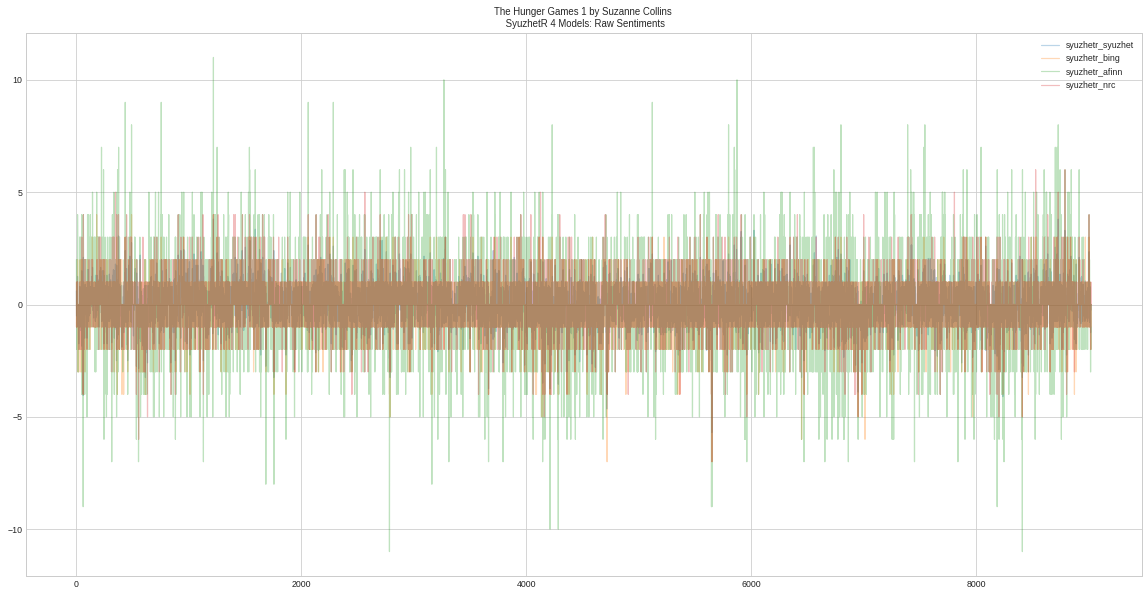

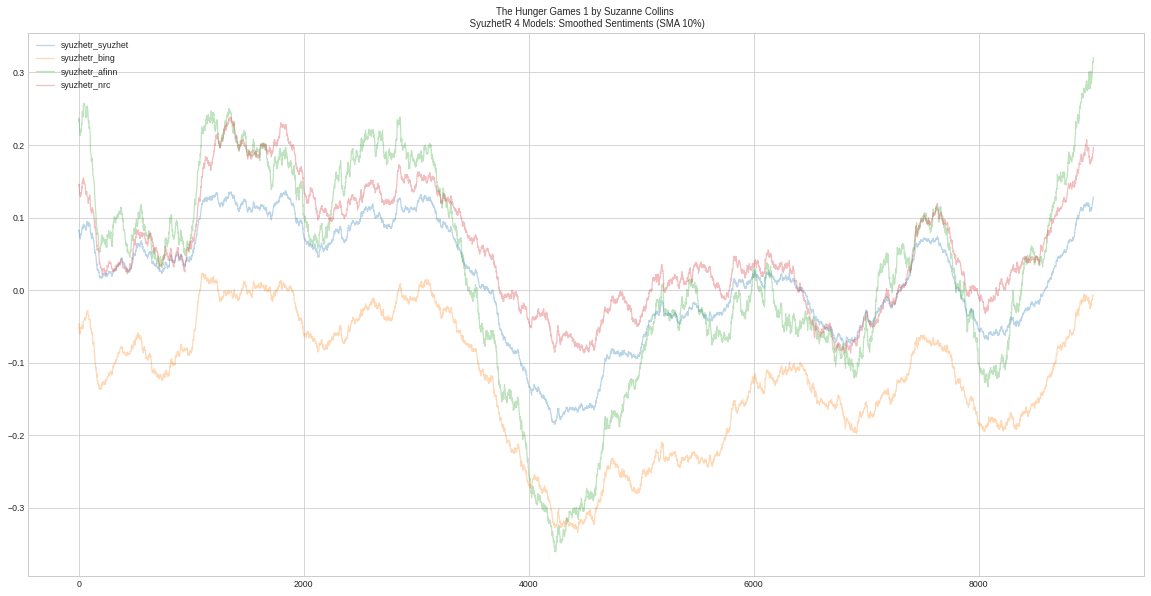

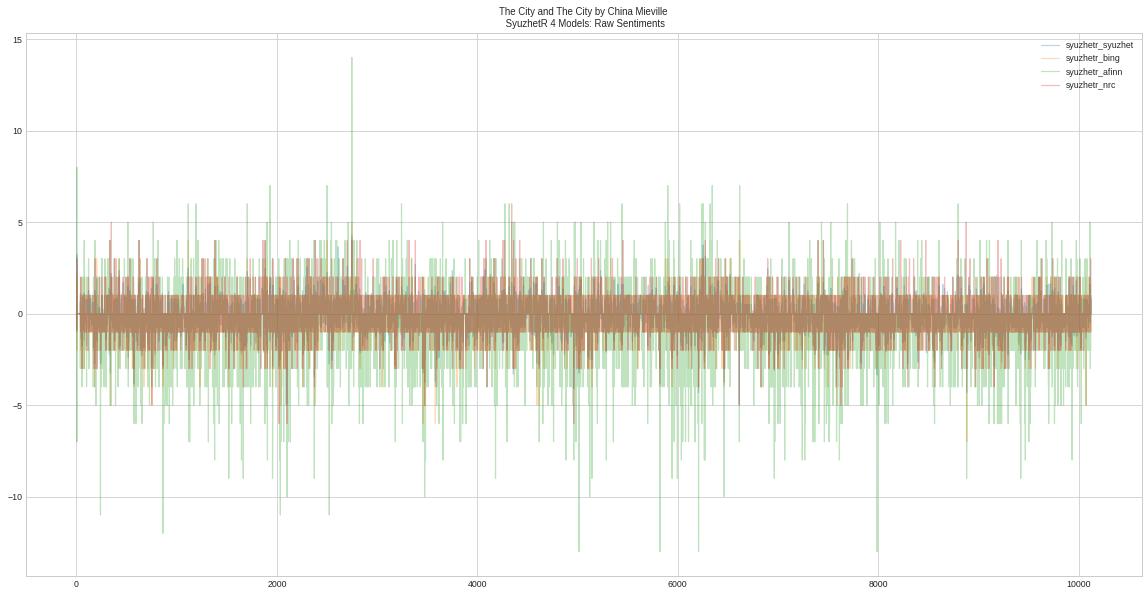

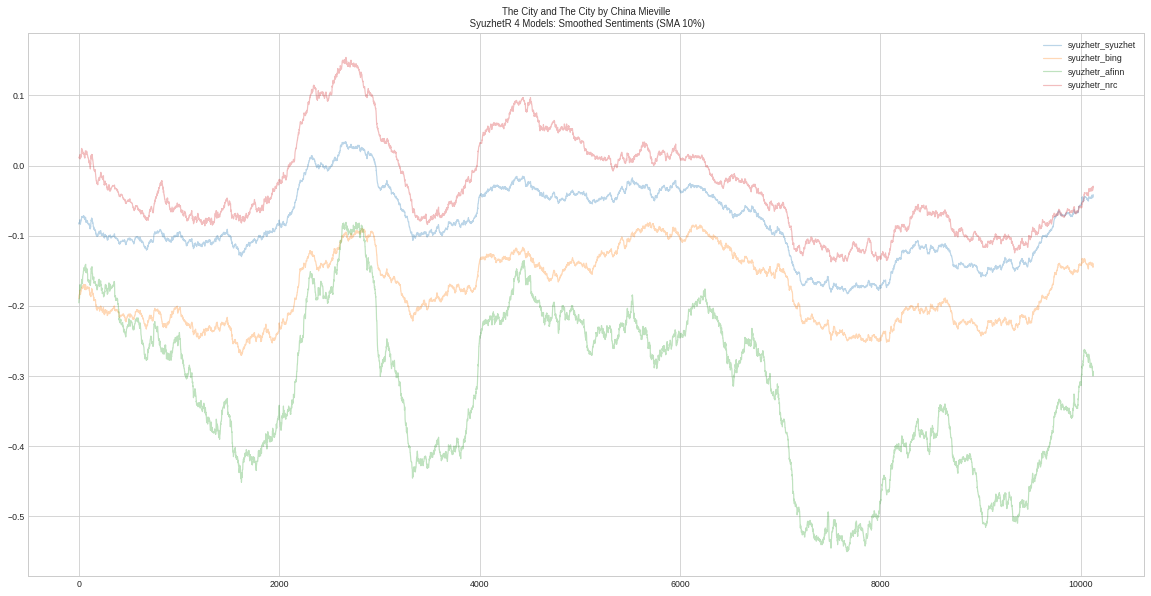

In [142]:
# Verify 4 SyuzhetR Models with Plots

for i, anovel in enumerate(list(corpus_texts_dt.keys())):

  print(f'Novel #{i}: {global_vars.corpus_titles_dt[anovel][0]}')

  # Raw Sentiments 
  fig = corpus_texts_dt[anovel][cols_syuzhetr_ls].plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SyuzhetR 4 Models: Raw Sentiments', alpha=0.3)
  # plt.show();

  if Save_Raw_Plots:
    save_filename = f'{global_vars.SUBDIR_GRAPHS}{{plot_syuzhetr_raw_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))

  
  # Smoothed Sentiments (SMA 10%)
  # novel_sample = 'cdickens_achristmascarol'
  win_10per = int(corpus_texts_dt[anovel].shape[0] * 0.1)
  corpus_texts_dt[anovel][cols_syuzhetr_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SyuzhetR 4 Models: Smoothed Sentiments (SMA 10%)', alpha=0.3)
  # plt.show();

  if Save_Smooth_Plots:
    save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_syuzhetr_smooth10sma_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))


# **[STEP 5] Get Sentiments with SentimentR (7 Models)**

## Compute New SentimentR Values

Call function in external get_sentimentr.R from within Python Loop

* https://medium.com/analytics-vidhya/calling-r-from-python-magic-of-rpy2-d8cbbf991571

* https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html

In [81]:
%%file get_sentimentr.R

library(sentimentr)
library(lexicon)

get_sentimentr_values <- function(s_v) {
  
  print('Processing sentimentr_jockersrinker')
  sentimentr_jockersrinker <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers_rinker, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_jockers')
  sentimentr_jockers <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_huliu')
  sentimentr_huliu <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_huliu, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_nrc')
  sentimentr_nrc <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_nrc, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_senticnet')
  sentimentr_senticnet <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_senticnet, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_sentiword')
  sentimentr_sentiword <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_sentiword, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_loughran_mcdonald')
  sentimentr_loughran_mcdonald <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_loughran_mcdonald, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_socal_google')
  sentimentr_socal_google <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_socal_google, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  anovel_sentimentr_df <- data.frame('text_clean' = s_v,
                                'sentimentr_jockersrinker' = sentimentr_jockersrinker$sentiment,
                                'sentimentr_jockers' = sentimentr_jockers$sentiment,
                                'sentimentr_huliu' = sentimentr_huliu$sentiment,
                                'sentimentr_nrc' = sentimentr_nrc$sentiment,
                                'sentimentr_senticnet' = sentimentr_senticnet$sentiment,
                                'sentimentr_sentiword' = sentimentr_sentiword$sentiment,
                                'sentimentr_loughran_mcdonald' = sentimentr_loughran_mcdonald$sentiment,
                                'sentimentr_socal_google' = sentimentr_socal_google$sentiment
                                )
  return(anovel_sentimentr_df)

}

Overwriting get_sentimentr.R


In [82]:
# Verify the *.R file above was written correctly

!cat get_sentimentr.R


library(sentimentr)
library(lexicon)

get_sentimentr_values <- function(s_v) {
  
  print('Processing sentimentr_jockersrinker')
  sentimentr_jockersrinker <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers_rinker, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_jockers')
  sentimentr_jockers <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_jockers, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
                                        adversative.weight=0.25, neutral.nonverb.like = FALSE, missing_value = 0)

  print('Processing sentimentr_huliu')
  sentimentr_huliu <- sentiment(s_v, polarity_dt=lexicon::hash_sentiment_huliu, 
                                        hypen="", amplifier.weight=0.8, n.before=5, n.after=2,
           

In [83]:
# Setup python robject with external library::function()
# https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html

# import rpy2.robjects as robjects

# Defining the R script and loading the instance in Python
# from rpy2.robjects import pandas2ri 
r = robjects.r

# Loading the function we have defined in R.
r['source']('get_sentimentr.R')

# Reading and processing data
get_sentimentr_function_r = robjects.globalenv['get_sentimentr_values']

value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [84]:
# Test

# Convert Python List of Strings to a R vector of characters
test_ls = corpus_texts_dt[next(iter(corpus_texts_dt))]['text_clean'].to_list()
s_v = robjects.StrVector(test_ls)
type(s_v)

get_sentimentr_function_r(s_v)

rpy2.robjects.vectors.StrVector

[1] "Processing sentimentr_jockersrinker"


From cffi callback <function _processevents at 0x7f0c4f32f950>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"


text_clean,sentimentr_jockersrinker,sentimentr_jockers,...,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
'mr meyer...,0.350076,0.350076,...,0.112438,0.000000,1.205499
'the role...,0.233487,0.233487,,0.240409,0.000000,0.663455
'my journ...,0.583824,0.583824,,0.148071,0.000000,0.376024
'i bring ...,0.194029,0.194029,,-0.040423,0.000000,1.392630
...,...,...,,...,...,...
'forecast...,-0.653197,-0.244949,,-0.102062,-0.408248,0.000000
'see chri...,0.047246,0.047246,,-0.013386,-0.188982,1.246812
'see wall...,-0.250000,-0.250000,,0.219444,-0.333333,-0.784775
'bis cent...,0.125000,0.125000,,-0.093750,0.000000,1.212122


In [86]:
corpus_texts_dt.keys()

dict_keys(['bogfederalreserve_speech_1997-2022', 'eucentralbank_speeches_1998-2022'])

In [151]:
text_clean_ct = corpus_texts_dt[next(iter(corpus_texts_dt))].text_clean.isna().sum()
text_clean_ct
# len(text_clean_ls.isnull())

0

**[RE-EXECUTE] May have to re-execute following code cell several times**

In [ ]:
%whos dict

Variable           Type    Data/Info
------------------------------------
corpus_texts_dt    dict    n=2
corpus_titles_dt   dict    n=2
models_titles_dt   dict    n=34
myparams           dict    n=1
test_dt            dict    n=2


In [152]:
corpus_texts_dt.keys()

dict_keys(['scollins_thehungergames1', 'cmieville_thecityandthecity'])

In [85]:
%%time

# NOTE: 8m19s 13 Novels 
#      16m39s 19 Novels
#     -----------------
#      24m58s 32 Novels
#       5m00s  @19:44 on 20220227 Colab Pro (2 Novels)

# Call external get_sentimentr::get_sentimentr_values with Python loop over all novels

# novels_sentimentr_dt = {}

anovel_df = pd.DataFrame()

novels_titles_ls = list(corpus_texts_dt.keys())
novels_titles_ls.sort()
# for i, anovel in enumerate(novels_titles_ls[:19]):
for i, anovel in enumerate(novels_titles_ls):  
  print(f'\nProcessing Novel #{i}: {anovel}')
  
  # Delete contents of anovel_df DataFrame
  anovel_df = anovel_df[0:0]

  print(f'     {corpus_texts_dt[anovel].shape}')
  # Get text_clean as list of strings
  text_clean_ls = corpus_texts_dt[anovel]['text_clean'].to_list()

  # Convert Python List of Strings to a R vector of characters
  # https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html
  s_v = robjects.StrVector(text_clean_ls)
  anovel_df_r = get_sentimentr_function_r(s_v)

  # Convert rpy2.robjects.vectors.DataFrame to pandas.core.frame.DataFrame
  # https://stackoverflow.com/questions/20630121/pandas-how-to-convert-r-dataframe-back-to-pandas 
  print(f'type(anovel_df_r): {type(anovel_df_r)}')
  anovel_df = pd.DataFrame.from_dict({ key : np.asarray(anovel_df_r.rx2(key)) for key in anovel_df_r.names })
  print(f'type(anovel_df): {type(anovel_df)}')

  # Save Results
  # novels_dt[anovel] = anovel_df.copy(deep=True)

  # This works for Novels New Corpus Texts
  corpus_texts_dt[anovel]['sentimentr_jockersrinker'] = anovel_df['sentimentr_jockersrinker']
  corpus_texts_dt[anovel]['sentimentr_jockers'] = anovel_df['sentimentr_jockers']
  corpus_texts_dt[anovel]['sentimentr_huliu'] = anovel_df['sentimentr_huliu']
  corpus_texts_dt[anovel]['sentimentr_nrc'] = anovel_df['sentimentr_nrc']
  corpus_texts_dt[anovel]['sentimentr_senticnet'] = anovel_df['sentimentr_senticnet']
  corpus_texts_dt[anovel]['sentimentr_sentiword'] = anovel_df['sentimentr_sentiword']
  corpus_texts_dt[anovel]['sentimentr_loughran_mcdonald'] = anovel_df['sentimentr_loughran_mcdonald']
  corpus_texts_dt[anovel]['sentimentr_socal_google'] = anovel_df['sentimentr_socal_google'] 


"""
  # This works for Novels Reference Corpus Texts
  corpus_texts_dt[anovel]['sentimentr_jockersrinker'] = anovel_df[anovel]['sentimentr_jockersrinker']
  corpus_texts_dt[anovel]['sentimentr_jockers'] = anovel_df[anovel]['sentimentr_jockers']
  corpus_texts_dt[anovel]['sentimentr_huliu'] = anovel_df[anovel]['sentimentr_huliu']
  corpus_texts_dt[anovel]['sentimentr_nrc'] = anovel_df[anovel]['sentimentr_nrc']
  corpus_texts_dt[anovel]['sentimentr_senticnet'] = anovel_df[anovel]['sentimentr_senticnet']
  corpus_texts_dt[anovel]['sentimentr_sentiword'] = anovel_df[anovel]['sentimentr_sentiword']
  corpus_texts_dt[anovel]['sentimentr_loughran_mcdonald'] = anovel_df[anovel]['sentimentr_loughran_mcdonald']
  corpus_texts_dt[anovel]['sentimentr_socal_google'] = anovel_df[anovel]['sentimentr_socal_google'] 
""" 


Processing Novel #0: bogfederalreserve_speech_1997-2022
     (219966, 7)
[1] "Processing sentimentr_jockersrinker"
[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"
type(anovel_df_r): <class 'rpy2.robjects.vectors.DataFrame'>
type(anovel_df): <class 'pandas.core.frame.DataFrame'>

Processing Novel #1: eucentralbank_speeches_1998-2022
     (298570, 7)
[1] "Processing sentimentr_jockersrinker"
[1] "Processing sentimentr_jockers"
[1] "Processing sentimentr_huliu"
[1] "Processing sentimentr_nrc"
[1] "Processing sentimentr_senticnet"
[1] "Processing sentimentr_sentiword"
[1] "Processing sentimentr_loughran_mcdonald"
[1] "Processing sentimentr_socal_google"
type(anovel_df_r): <class 'rpy2.robjects.vectors.DataFrame'>
type(anovel_df): <class 'pandas.core.frame.DataFrame'>
CPU time

In [154]:
anovel_df.head()

,text_clean,sentimentr_jockersrinker,sentimentr_jockers,sentimentr_huliu,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
0,the tribute,0.424264,0.424264,0.000000,0.707107,0.183848,0.000000,0.0,0.000000
1,when i wake up the other side of the bed be cold,-0.144338,-0.144338,-0.288675,-0.288675,0.251436,0.081190,0.0,0.039576
2,my finger stretch out seek prims warmth but fi...,-0.087798,-0.087798,-0.351434,0.000000,-0.542204,-0.039442,0.0,-0.193970
3,she must have have bad dream and climb in with...,-0.144338,-0.144338,-0.288675,-0.288675,0.527409,-0.302851,0.0,-0.043956
4,of course she do,0.000000,0.000000,0.000000,0.000000,-0.156500,0.000000,0.0,0.000000


In [155]:
corpus_texts_dt[next(iter(corpus_texts_dt))].head()

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc,sentimentr_jockersrinker,sentimentr_jockers,sentimentr_huliu,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
0,"""THE TRIBUTES""",the tribute,0.60,0,2,1.0,0.424264,0.424264,0.000000,0.707107,0.183848,0.000000,0.0,0.000000
1,"When I wake up, the other side of the bed is c...",when i wake up the other side of the bed be cold,-0.50,-1,0,-1.0,-0.144338,-0.144338,-0.288675,-0.288675,0.251436,0.081190,0.0,0.039576
2,"My fingers stretch out, seeking Prims warmth b...",my finger stretch out seek prims warmth but fi...,0.25,0,2,0.0,-0.087798,-0.087798,-0.351434,0.000000,-0.542204,-0.039442,0.0,-0.193970
3,She must have had bad dreams and climbed in wi...,she must have have bad dream and climb in with...,-0.50,-1,-2,-1.0,-0.144338,-0.144338,-0.288675,-0.288675,0.527409,-0.302851,0.0,-0.043956
4,"Of course, she did.",of course she do,0.00,0,0,0.0,0.000000,0.000000,0.000000,0.000000,-0.156500,0.000000,0.0,0.000000


In [156]:
cols_sentimentr_ls = [x for x in corpus_texts_dt[next(iter(corpus_texts_dt))].columns if 'sentimentr_' in x]
cols_sentimentr_ls

['sentimentr_jockersrinker',
 'sentimentr_jockers',
 'sentimentr_huliu',
 'sentimentr_nrc',
 'sentimentr_senticnet',
 'sentimentr_sentiword',
 'sentimentr_loughran_mcdonald',
 'sentimentr_socal_google']

In [ ]:
"""
for i, anovel in enumerate(novels_keys_ls):
  print(f'Novel #{i}: {anovel}')
  for j, amodel in enumerate(cols_sentimentr_ls):
    print(f'           Model #{j}: {amodel}')
    corpus_dt[anovel][amodel] = novels_dt[anovel][amodel]
""";

In [157]:
# Verify DataFrame shape of first Text in Corpus

corpus_texts_dt[next(iter(corpus_texts_dt))].shape

(9021, 14)

## Checkpoint: Save SentimentR Values

In [87]:
# Verify in SentimentArcs Root Directory
#   and destination Subdir for Raw Sentiment Values

!pwd
print('\n')

print(f'PATH_SENTIMENT_RAW: {PATH_SENTIMENT_RAW}\n\n')

print('Existing Sentiment Datafiles in Destination Subdir:\n')

!ls $PATH_SENTIMENT_RAW

/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW: ./sentiment_raw/sentiment_raw_finance_reference


Existing Sentiment Datafiles in Destination Subdir:

all_finance_reference_4syuzhetr.json  test.txt


In [88]:
# Verify Saving Corpus

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

print(f'\nThese Text Titles:\n')
corpus_texts_dt.keys()

Saving Text_Type: finance
     Corpus_Type: reference

These Text Titles:



dict_keys(['bogfederalreserve_speech_1997-2022', 'eucentralbank_speeches_1998-2022'])

In [89]:
# Save sentiment values to subdir_sentiments

save_filename = f'all_{Corpus_Genre}_{Corpus_Type}_4sentimentr.json'

write_dict_dfs(corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}/')

Saving file to: ./sentiment_raw/sentiment_raw_finance_reference/all_finance_reference_4sentimentr.json


In [165]:
# Verify Dictionary was saved correctly by reading back the *.json datafile

test_dt = read_dict_dfs(in_file=save_filename, in_dir=PATH_SENTIMENT_RAW)
test_dt.keys()

dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])

## Plot SentimentR 7 Models

In [166]:
#@markdown Select option to save plots:
Save_Raw_Plots = True #@param {type:"boolean"}

Save_Smooth_Plots = True #@param {type:"boolean"}
Resolution = "300" #@param ["100", "300"]



In [167]:
# Get Col Names for all SentimentR Models
cols_all_ls = corpus_texts_dt[next(iter(corpus_texts_dt))].columns
cols_sentimentr_ls = [x for x in cols_all_ls if 'sentimentr_' in x]
cols_sentimentr_ls

['sentimentr_jockersrinker',
 'sentimentr_jockers',
 'sentimentr_huliu',
 'sentimentr_nrc',
 'sentimentr_senticnet',
 'sentimentr_sentiword',
 'sentimentr_loughran_mcdonald',
 'sentimentr_socal_google']

In [168]:
corpus_texts_dt[next(iter(corpus_texts_dt))]

,text_raw,text_clean,syuzhetr_syuzhet,syuzhetr_bing,syuzhetr_afinn,syuzhetr_nrc,sentimentr_jockersrinker,sentimentr_jockers,sentimentr_huliu,sentimentr_nrc,sentimentr_senticnet,sentimentr_sentiword,sentimentr_loughran_mcdonald,sentimentr_socal_google
0,"""THE TRIBUTES""",the tribute,0.60,0,2,1.0,0.424264,0.424264,0.000000,0.707107,0.183848,0.000000,0.000000,0.000000
1,"When I wake up, the other side of the bed is c...",when i wake up the other side of the bed be cold,-0.50,-1,0,-1.0,-0.144338,-0.144338,-0.288675,-0.288675,0.251436,0.081190,0.000000,0.039576
2,"My fingers stretch out, seeking Prims warmth b...",my finger stretch out seek prims warmth but fi...,0.25,0,2,0.0,-0.087798,-0.087798,-0.351434,0.000000,-0.542204,-0.039442,0.000000,-0.193970
3,She must have had bad dreams and climbed in wi...,she must have have bad dream and climb in with...,-0.50,-1,-2,-1.0,-0.144338,-0.144338,-0.288675,-0.288675,0.527409,-0.302851,0.000000,-0.043956
4,"Of course, she did.",of course she do,0.00,0,0,0.0,0.000000,0.000000,0.000000,0.000000,-0.156500,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,His voice isnt angry.,his voice be not angry,-0.75,-1,-3,-1.0,0.335410,0.335410,0.447214,0.447214,0.110462,0.055902,0.000000,1.329435
9017,"Its hollow, which is worse.",its hollow which be wrong,-1.25,-2,-3,-2.0,-0.559017,-0.559017,-0.894427,-0.894427,-0.353299,-0.237582,-0.447214,-1.649342
9018,Already the boy with the bread is slipping awa...,already the boy with the bread be slip away fr...,0.00,0,-1,-2.0,0.000000,0.000000,0.000000,-0.603023,0.622922,0.075378,0.000000,0.000000
9019,"I take his hand, holding on tightly, preparing...",i take his hand hold on tightly prepare for th...,-0.25,-1,-2,1.0,-0.052129,-0.052129,-0.208514,0.208514,0.551938,-0.397481,0.000000,0.000000


In [169]:
print(f'Saving Plots to SUBDIR_PLOTS: {SUBDIR_PLOTS}')

Saving Plots to SUBDIR_PLOTS: ./plots/novels_plots/


In [173]:
%whos str

Variable                   Type    Data/Info
--------------------------------------------
Corpus_Genre               str     novels
Corpus_Type                str     new
PATH_SENTIMENT_RAW         str     ./sentiment_raw/sentiment_raw_novels_new_corpus1/
PATH_TEXT_CLEAN            str     ./text_clean/text_clean_novels_new_corpus1/
PATH_TEXT_CLEAN_CORPUS     str     ./text_clean/text_clean_novels_new_corpus2/
PATH_TEXT_RAW              str     ./text_raw/text_raw_novels_new_corpus1/
PATH_TEXT_RAW_CORPUS       str     ./text_raw/text_raw_novels_new_corpus2/
PATH_UTILS                 str     /gdrive/MyDrive/sentimentarcs_notebooks/utils
Path_to_SentimentArcs      str     /gdrive/MyDrive/sentimentarcs_notebooks/
Resolution                 str     300
SUBDIR_PLOTS               str     ./plots/novels_plots/
SUBDIR_SENTIMENT_CLEAN     str     ./sentiment_clean/novels_sentiment_new_clean/
SUBDIR_SENTIMENT_RAW       str     ./sentiment_raw/novels_sentiment_new_raw/
SUBDIR_TEXT_CLEAN        

In [175]:
print(f'{global_vars.SUBDIR_GRAPHS}plot_sentimentr_raw_{anovel}_dpi{Resolution}.png')

./graphs/graphs_novels/plot_sentimentr_raw_scollins_thehungergames1_dpi300.png


Novel #0: The Hunger Games 1 by Suzanne Collins 


Saving to: ./graphs/graphs_novels/plot_sentimentr_raw_scollins_thehungergames1_dpi300.png




Saving to: ./graphs/graphs_novels/plot_sentimentr_smooth10sma_scollins_thehungergames1_dpi300.png
Novel #1: The City and The City by China Mieville


Saving to: ./graphs/graphs_novels/plot_sentimentr_raw_cmieville_thecityandthecity_dpi300.png




Saving to: ./graphs/graphs_novels/plot_sentimentr_smooth10sma_cmieville_thecityandthecity_dpi300.png


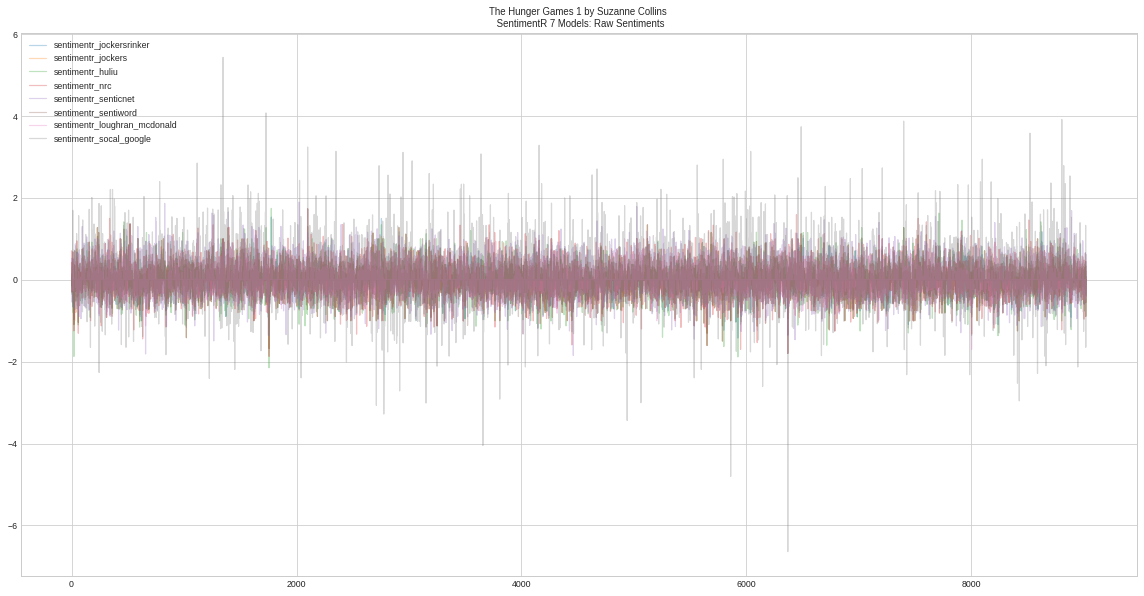

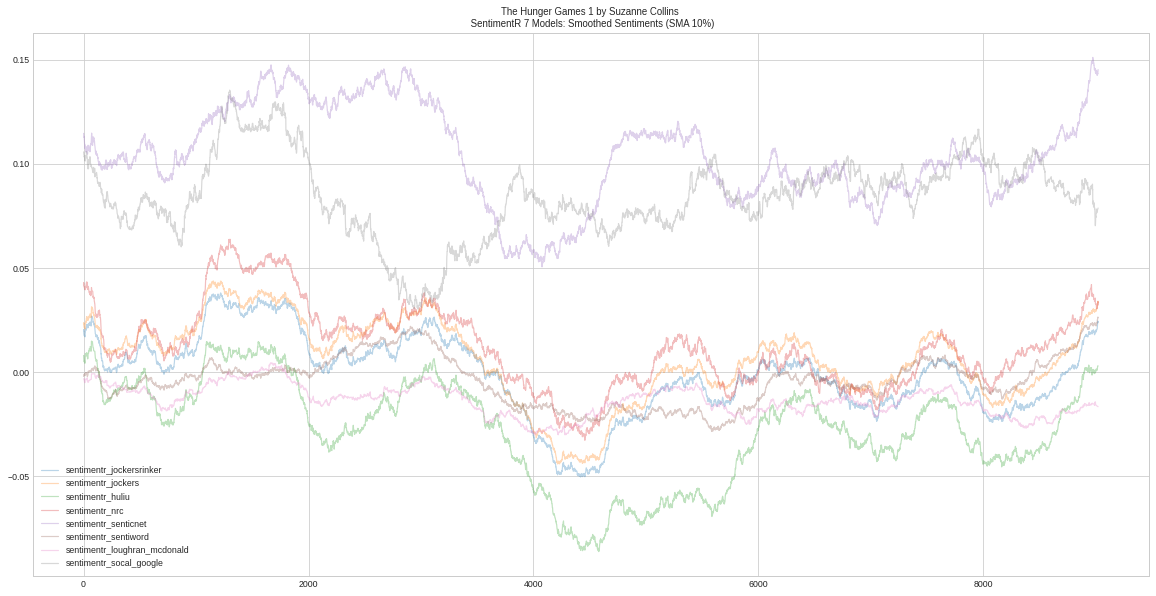

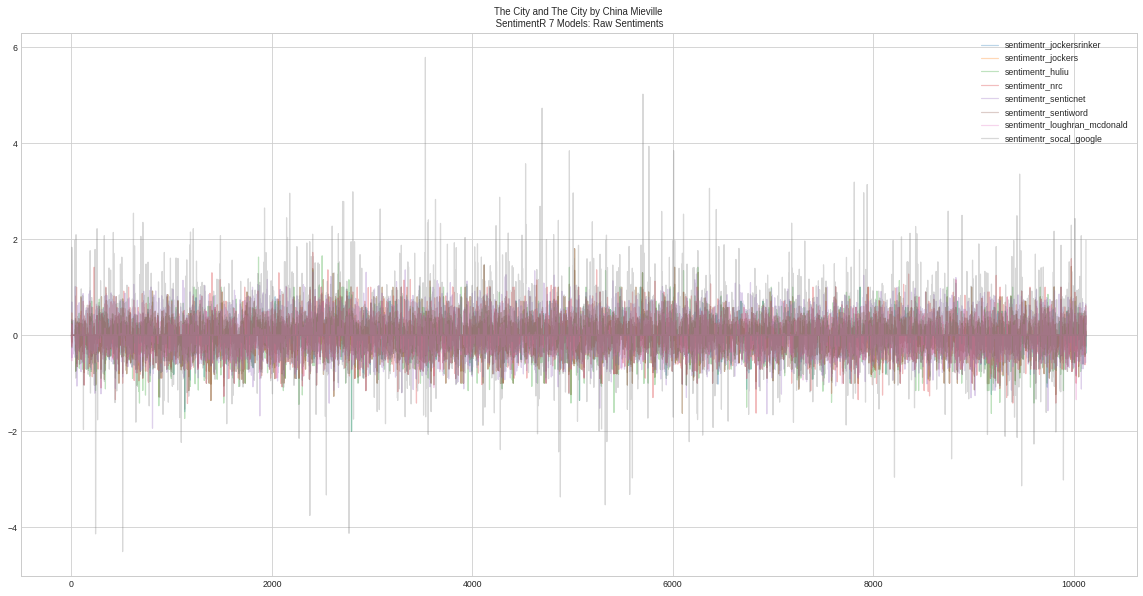

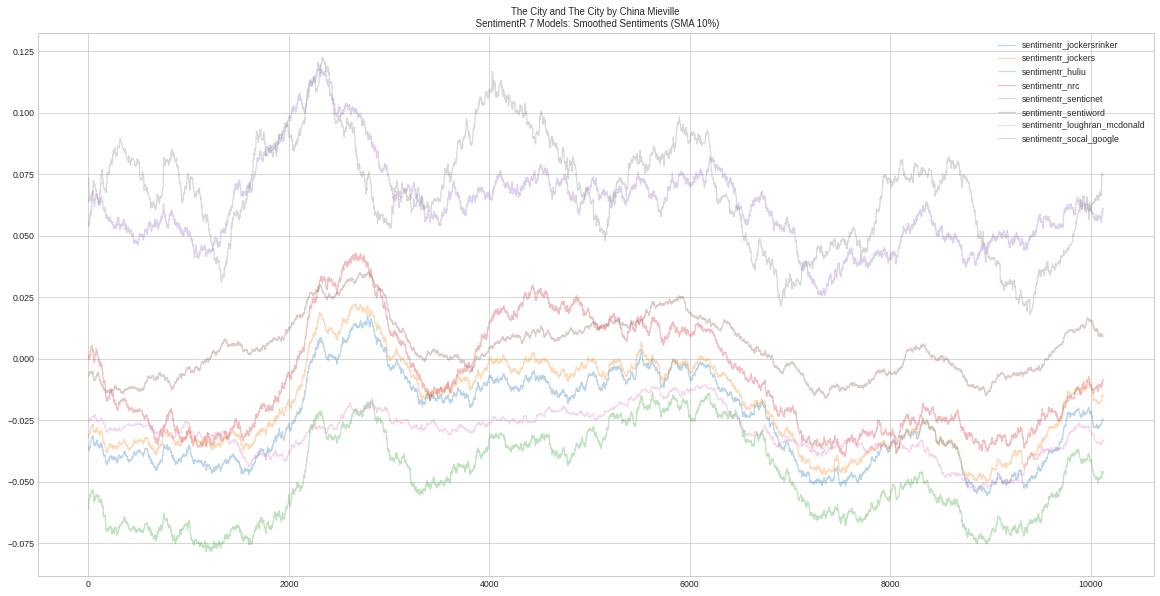

In [177]:
# Verify 7 SentimentR Models with Plots

for i, anovel in enumerate(list(corpus_texts_dt.keys())):

  print(f'Novel #{i}: {global_vars.corpus_titles_dt[anovel][0]}')

  # Raw Sentiments 
  fig = corpus_texts_dt[anovel][cols_sentimentr_ls].plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SentimentR 7 Models: Raw Sentiments', alpha=0.3)
  # plt.show();

  if Save_Raw_Plots:
    save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_sentimentr_raw_{anovel}_dpi{Resolution}.png'
    save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_sentimentr_raw_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))

  
  # Smoothed Sentiments (SMA 10%)
  # novel_sample = 'cdickens_achristmascarol'
  win_10per = int(corpus_texts_dt[anovel].shape[0] * 0.1)
  corpus_texts_dt[anovel][cols_sentimentr_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f'{global_vars.corpus_titles_dt[anovel][0]}\n SentimentR 7 Models: Smoothed Sentiments (SMA 10%)', alpha=0.3)
  # plt.show();

  if Save_Smooth_Plots:
    save_filename = f'{global_vars.SUBDIR_GRAPHS}plot_sentimentr_smooth10sma_{anovel}_dpi{Resolution}.png'
    print(f'\n\nSaving to: {save_filename}')
    plt.savefig(save_filename, dpi=int(Resolution))


# **END OF NOTEBOOK**

---